In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
import preprocessing_time_series as pts


os.chdir(pts.working_dir())

Populating the interactive namespace from numpy and matplotlib


``` bash
sudo python preprocessing_time_series.py
```

In [19]:
data_train = pd.read_csv('train_SONORA_timeseries.csv')
print(data_train.shape)
data_train.head()

(1645650, 112)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,No_remains_5,Venta_hoy_by_uni_5,Ordered_5,Log_Demanda_5,Median_Producto_ID_5,LogMean_Producto_ID_5,Median_Producto_ID_Ruta_SAK_5,LogMean_Producto_ID_Ruta_SAK_5,Median_Producto_ID_Cliente_ID_Agencia_ID_5,LogMean_Producto_ID_Cliente_ID_Agencia_ID_5
0,3,1512,7,3310,39502,1146,6,128.34,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1512,7,3310,70786,1146,86,1839.54,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1512,7,3310,70786,1216,28,234.64,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1512,7,3310,70786,1240,21,175.98,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1512,7,3310,70786,1250,21,160.44,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
(~data_train.isnull()).sum()

Semana                                         1645650
Agencia_ID                                     1645650
Canal_ID                                       1645650
Ruta_SAK                                       1645650
Cliente_ID                                     1645650
Producto_ID                                    1645650
Venta_uni_hoy                                  1645650
Venta_hoy                                      1645650
Dev_uni_proxima                                1645650
Dev_proxima                                    1645650
Demanda_uni_equil                              1645650
Town                                           1645650
State                                          1645650
NombreProducto                                 1645650
brand                                          1645650
weight                                         1613041
pieces                                         1131492
Has_choco                                      1645650
Has_vanill

In [21]:
print(data_train.columns[:50])

Index([u'Semana', u'Agencia_ID', u'Canal_ID', u'Ruta_SAK', u'Cliente_ID',
       u'Producto_ID', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Town', u'State',
       u'NombreProducto', u'brand', u'weight', u'pieces', u'Has_choco',
       u'Has_vanilla', u'Has_multigrano', u'NombreCliente',
       u'Dev_proxima_by_uni', u'No_remains', u'Venta_hoy_by_uni', u'Ordered',
       u'Log_Demanda', u'Median_Producto_ID', u'LogMean_Producto_ID',
       u'Median_Producto_ID_Ruta_SAK', u'LogMean_Producto_ID_Ruta_SAK',
       u'Median_Producto_ID_Cliente_ID_Agencia_ID',
       u'LogMean_Producto_ID_Cliente_ID_Agencia_ID', u'Venta_uni_hoy_1',
       u'Venta_hoy_1', u'Dev_uni_proxima_1', u'Dev_proxima_1',
       u'Demanda_uni_equil_1', u'Dev_proxima_by_uni_1', u'No_remains_1',
       u'Venta_hoy_by_uni_1', u'Ordered_1', u'Log_Demanda_1',
       u'Median_Producto_ID_1', u'LogMean_Producto_ID_1',
       u'Median_Producto_ID_Ruta_SAK_1', u'LogMean_Pro

In [22]:
data_train = data_train.drop([u'Town', u'State', u'NombreProducto', u'brand', 
        u'NombreCliente', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered',u'Median_Producto_ID',
       u'LogMean_Producto_ID', u'Median_Producto_ID_Ruta_SAK',
       u'LogMean_Producto_ID_Ruta_SAK',
       u'Median_Producto_ID_Cliente_ID_Agencia_ID',
       u'LogMean_Producto_ID_Cliente_ID_Agencia_ID'], axis=1)

In [6]:
import crossval

cv5fold, strats = crossval.crossvalidation(data_train[['Canal_ID', 'Semana']])
strats.value_counts()

1_3    217967
1_4    214419
1_5    209830
1_6    209666
1_7    204756
1_8    185137
1_9    176569
4_9     23588
4_8     22560
4_6     22213
4_4     22115
4_5     22009
4_7     22003
4_3     21668
2_8      6332
2_9      6036
7_7      5417
7_9      5172
7_4      5151
7_8      5140
7_6      5007
7_3      4851
7_5      4843
2_7      4688
2_6      3931
2_5      3667
2_4      3501
2_3      3418
5_3       537
5_4       520
5_9       518
5_6       504
5_5       503
5_8       501
5_7       493
8_9        97
8_8        96
8_7        65
8_6        47
8_5        41
8_4        38
8_3        36
dtype: int64

# Random Forest

In [23]:
def plot_feature_importances(rf, feat_labels): 
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title('RF Feature Importances')
    plt.bar(range(len(feat_labels)), 
            importances[indices],
            color='lightblue', 
            align='center')


    plt.xticks(range(len(feat_labels)), feat_labels[indices], rotation=90)
    plt.xlim([-1, len(feat_labels)])
    plt.tight_layout()
#     plt.savefig('./rf_feature_importance.png', dpi=300)
    plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
rf = RandomForestRegressor(n_estimators=3, criterion='mse', n_jobs=-1, verbose=10)

scores = cross_val_score(rf, data_train.fillna(-999).drop('Log_Demanda', axis=1), 
                         data_train['Log_Demanda'],
                scoring = 'mean_squared_error', cv = cv5fold, n_jobs=-1)
rf.fit(data_train.fillna(-999).drop('Log_Demanda', axis=1), 
        data_train['Log_Demanda'])

 building tree 2 of 3
building tree 1 of 3
building tree 1 of 3
building tree 3 of 3
 building tree 2 of 3
 building tree 3 of 3
building tree 1 of 3
 building tree 2 of 3
building tree 3 of 3
building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  4.0min remaining:  -59.9s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  4.0min remaining:  -60.2s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  4.1min remaining:  -60.8s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.6s remaining:   -0.2s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.6s remaining:   -0.2s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  4.1min remaining:  -61.6s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  4.1min remaining:  -61.6s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  4.1min remaining:  -61.8s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.1min finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.5s remaining:

building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.1min remaining:  -15.9s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.1min remaining:  -16.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s finished


building tree 1 of 3
building tree 2 of 3
building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.3min remaining:  -19.9s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.3min remaining:  -20.1s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3, n_jobs=-1, oob_score=False, random_state=None,
           verbose=10, warm_start=False)

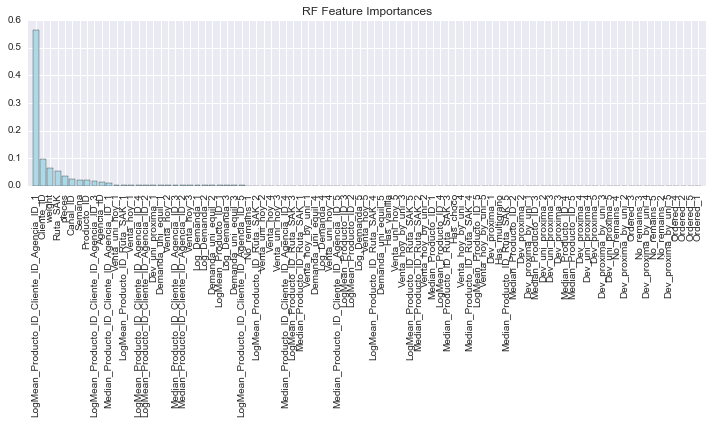

[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    1.1s remaining:   -0.3s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    1.1s remaining:   -0.3s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.1s finished


[-0.31969597 -0.27200587 -0.30204947 -0.31726639 -0.29914926] 0.243273495992


In [28]:
plot_feature_importances(rf, data_train.drop('Log_Demanda', axis=1).columns)
r2 = rf.score(data_train.fillna(-999).drop('Log_Demanda', axis=1), 
        data_train['Log_Demanda'])

rmse = np.sqrt((1-r2)*data_train['Log_Demanda'].var())
print (scores, rmse)

3 дерева в лесе на кроссвалидации показывают результат в топ-1 лидерборда. Пора генерить сабмит! 